In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

In [3]:
df = pd.read_csv('../04_merging_dataframes/gapminder_total.csv',index_col=0)

In [4]:
df_sub = df.loc[df['year'] == 1992]
df_sub

continent    country  year  life_expectancy  population  fertility
42            Africa    Algeria  1992             70.9  27180921.0       4.24
108           Africa     Angola  1992             49.6  11848971.0       7.12
174           Africa      Benin  1992             56.6   5378226.0       6.60
240           Africa   Botswana  1992             61.2   1460453.0       4.39
306           Africa    Burundi  1992             45.3   5895131.0       7.47
...              ...        ...   ...              ...         ...        ...
10800  South America   Paraguay  1992             74.1   4432738.0       4.36
10866  South America       Peru  1992             69.5  22737056.0       3.62
10932  South America   Suriname  1992             69.8    423572.0       2.64
10998  South America    Uruguay  1992             73.2   3154853.0       2.49
11064  South America  Venezuela  1992             72.4  20799471.0       3.29

[168 rows x 6 columns]

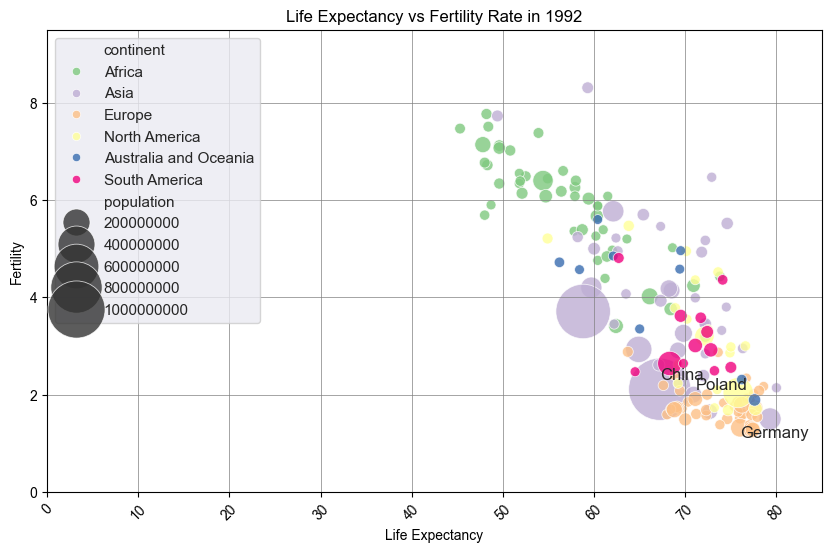

In [5]:
plt.figure(figsize=(10, 6)) #this has to be before the sns.scatterplot, otherwise created a second one
plt.axis([0, 85, 0, 9.5])
plt.legend('upper left')
plt.title('Life Expectancy vs Fertility Rate in 1992')
plt.ylabel('Fertility')
plt.xlabel('Life Expectancy');
#now adding some extras as per the challenge
plt.xticks(rotation=45) 
sns.set_theme(style="dark")

sns.scatterplot(x ="life_expectancy", y="fertility", data=df_sub, size = 'population', sizes = (50,2000),
                hue = 'continent',palette="Accent", alpha = 0.8);
plt.annotate('China',(df_sub[df_sub['country']== 'China']['life_expectancy'].iloc[0], #x-axis
                        df_sub[df_sub['country']== 'China']['fertility'].iloc[0]+0.20)) #y-axis
plt.annotate('Poland',(df_sub[df_sub['country']== 'Poland']['life_expectancy'].iloc[0],
                        df_sub[df_sub['country']== 'Poland']['fertility'].iloc[0]+0.20)) 
plt.annotate('Germany',(df_sub[df_sub['country']== 'Germany']['life_expectancy'].iloc[0],
                        df_sub[df_sub['country']== 'Germany']['fertility'].iloc[0]-0.20));
# adding .iloc[0] to ensure that only the first (and only) value in the Series is used, otherwise I get warnings
plt.grid(color='gray', linewidth=0.5)


C:\Users\HP\AppData\Local\Temp\ipykernel_11512\2780175220.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


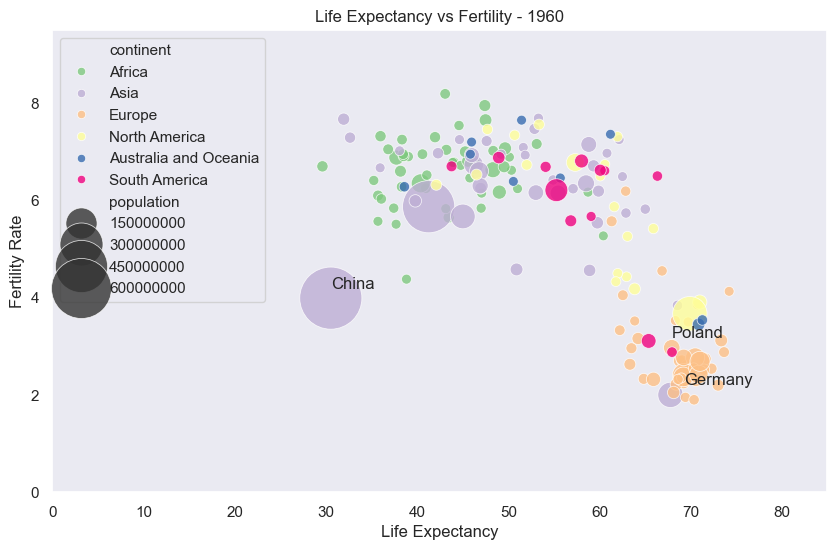

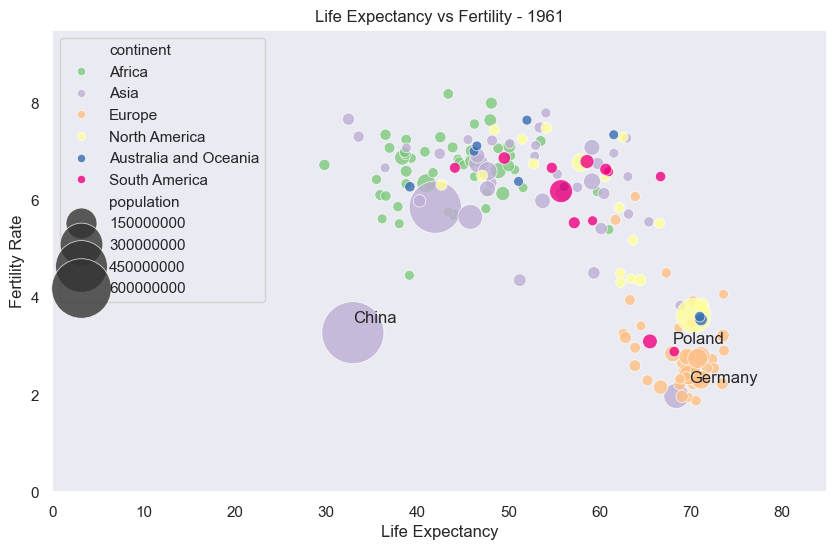

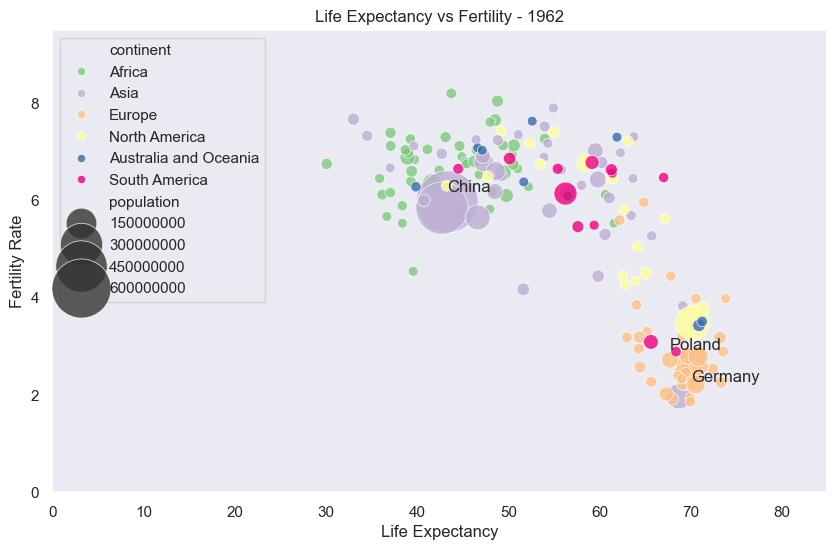

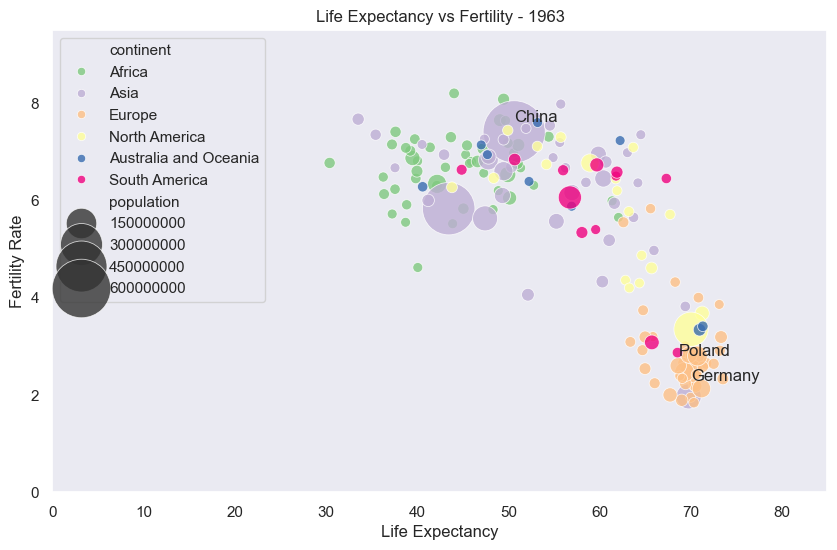

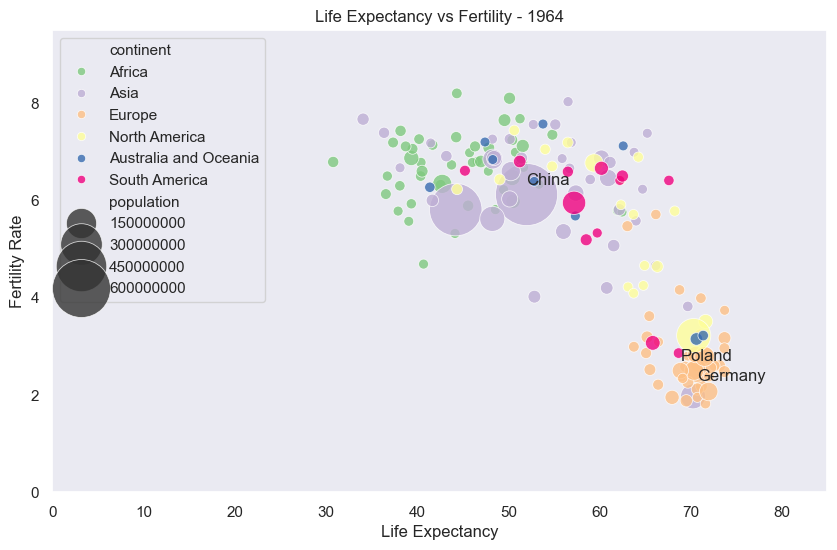

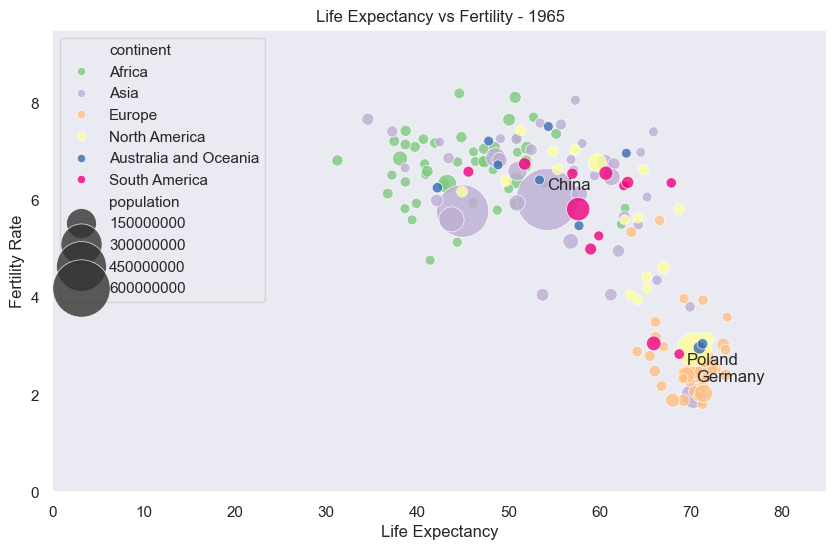

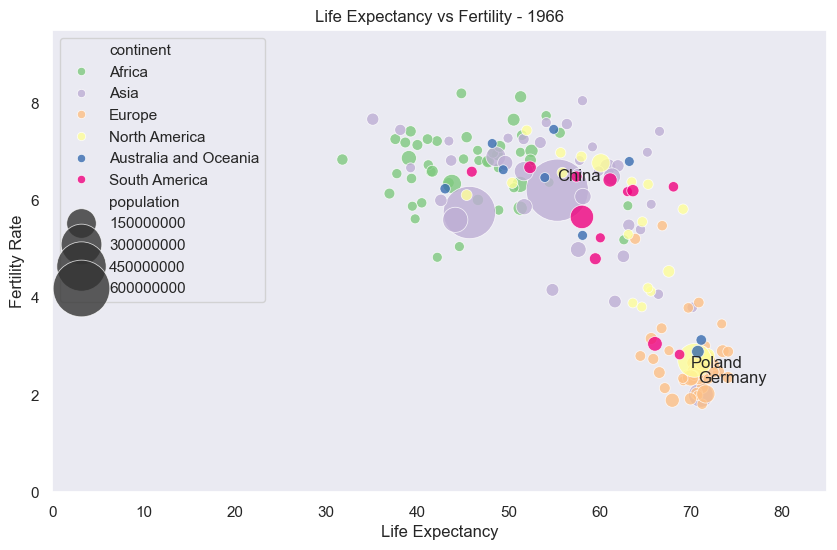

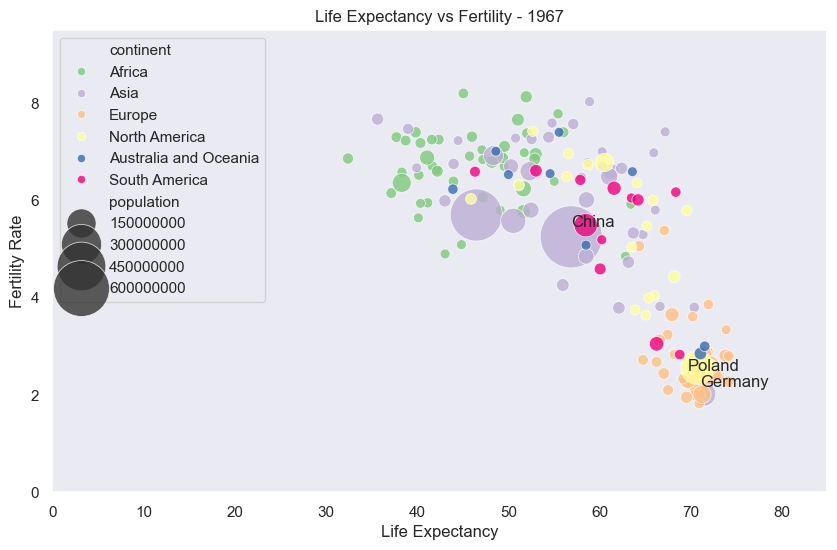

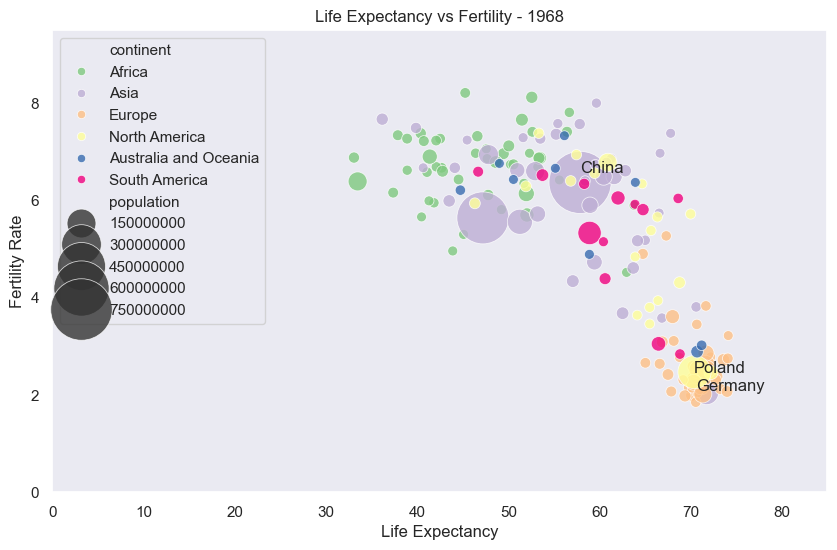

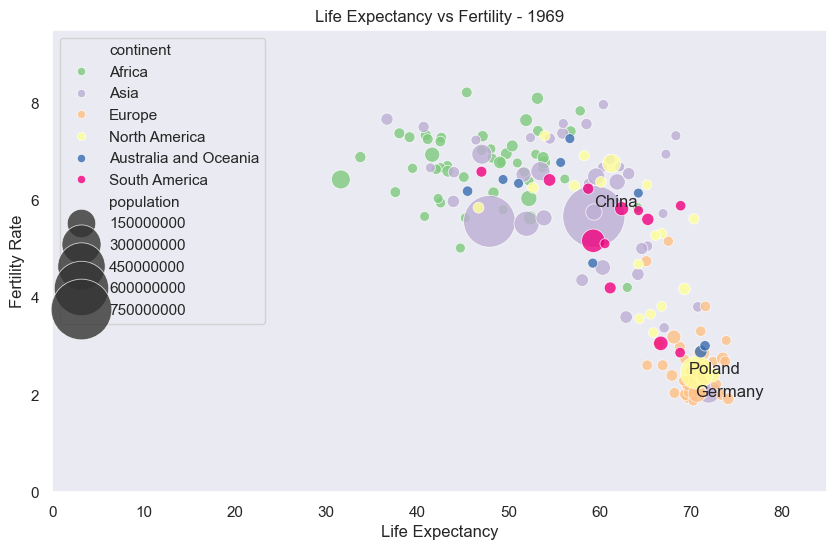

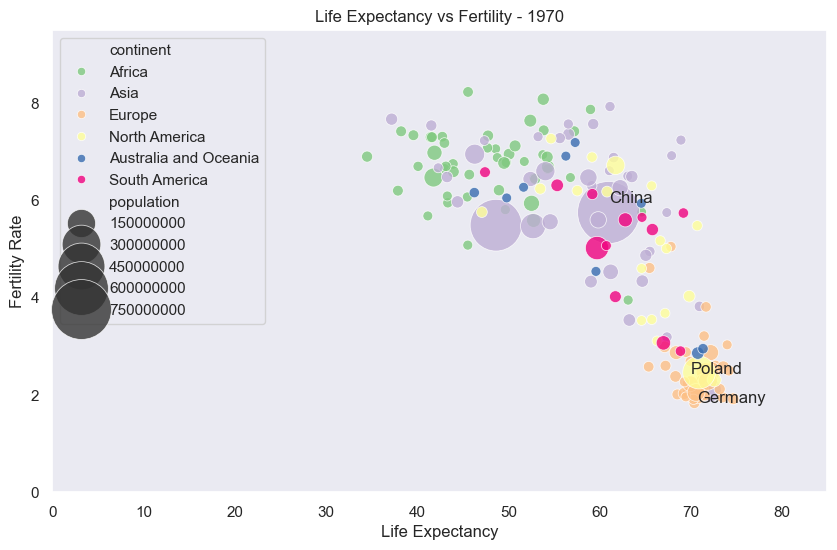

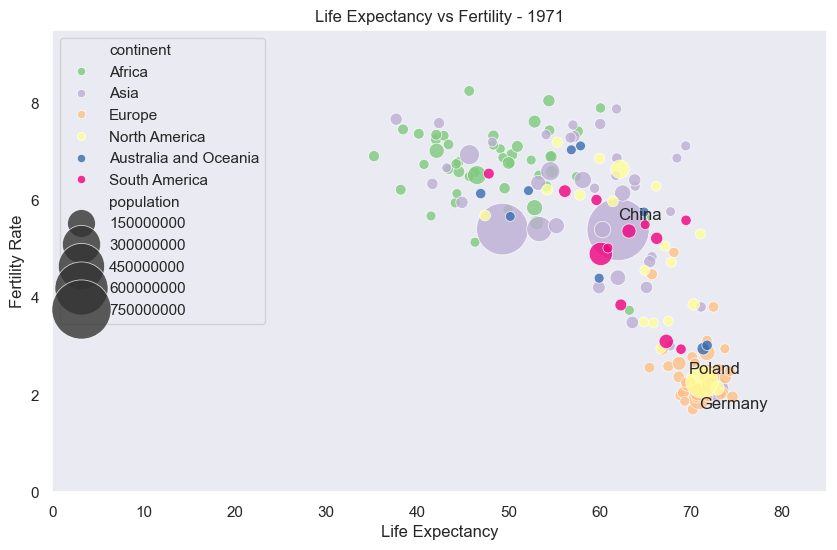

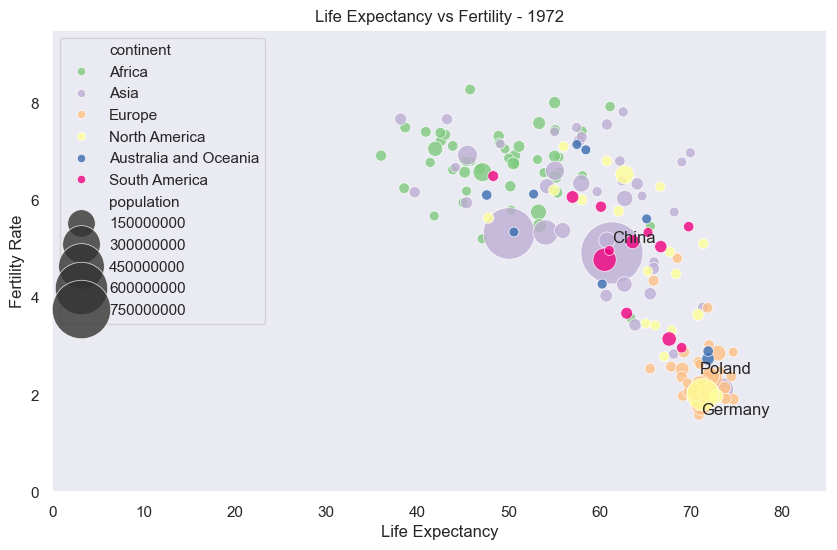

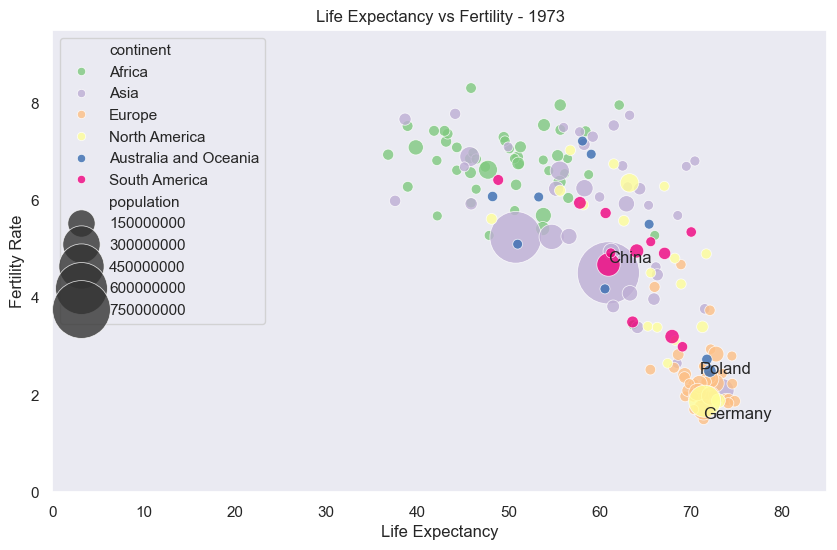

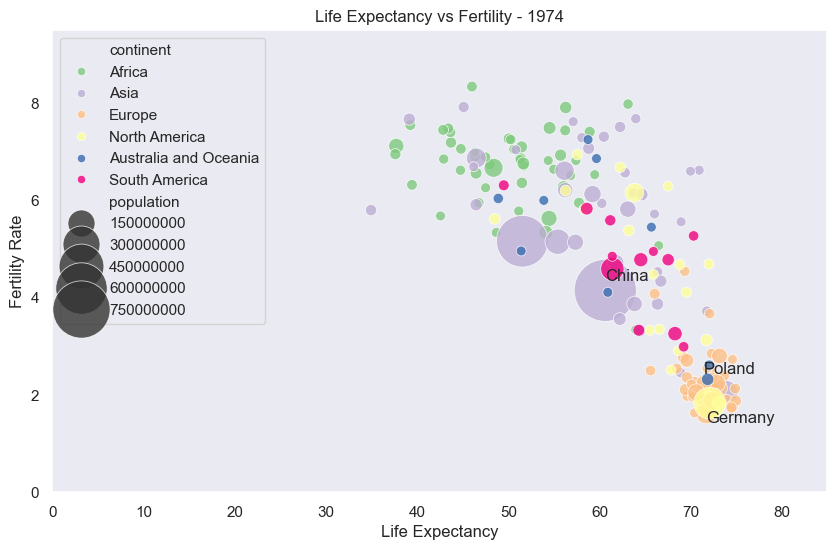

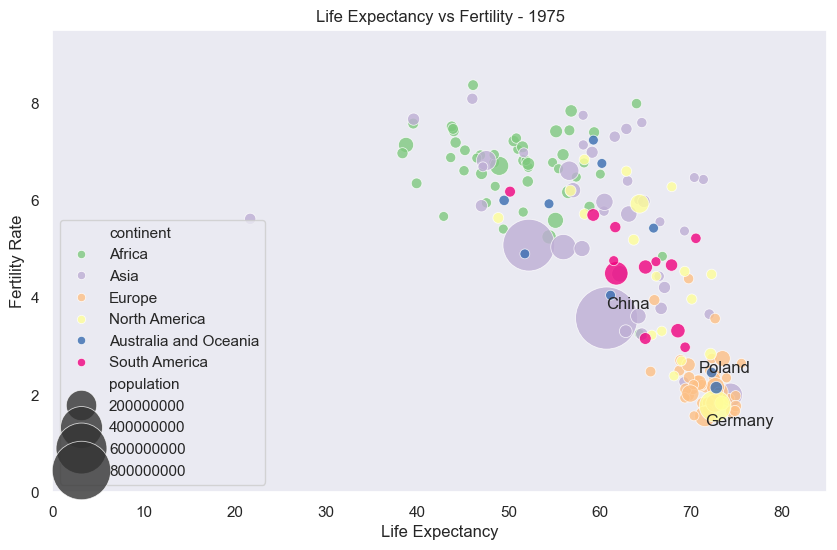

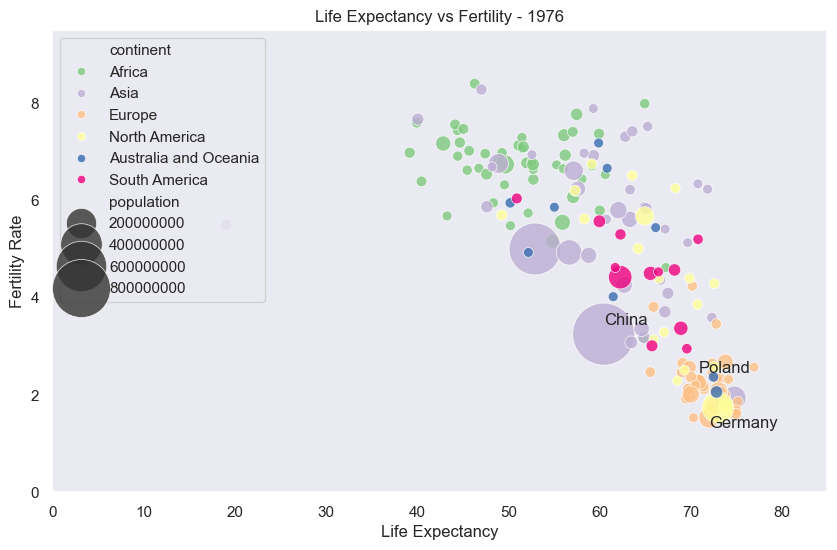

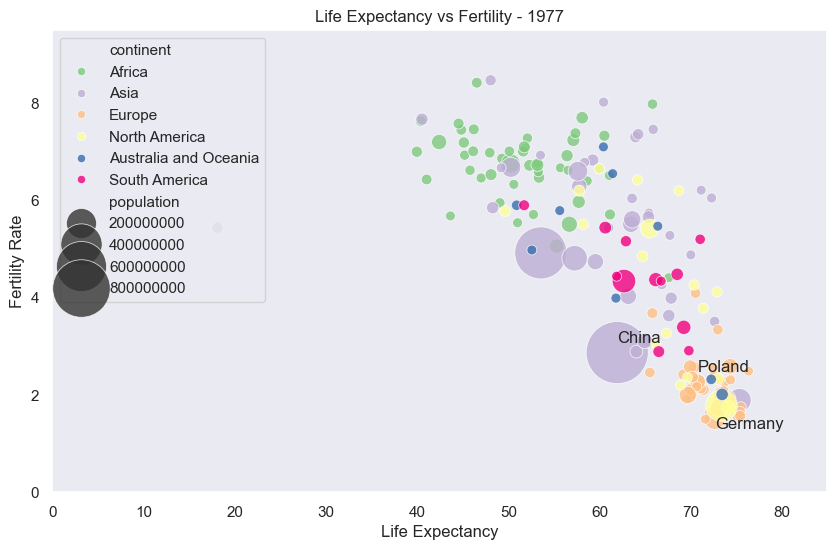

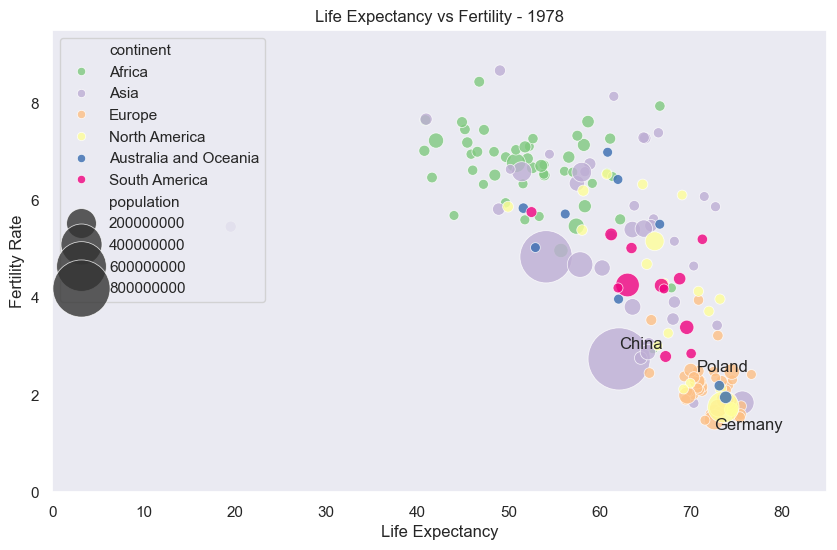

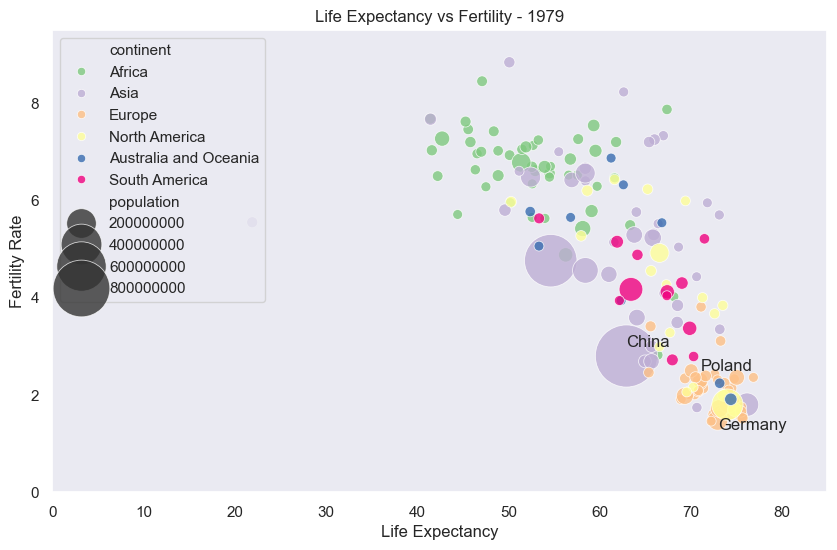

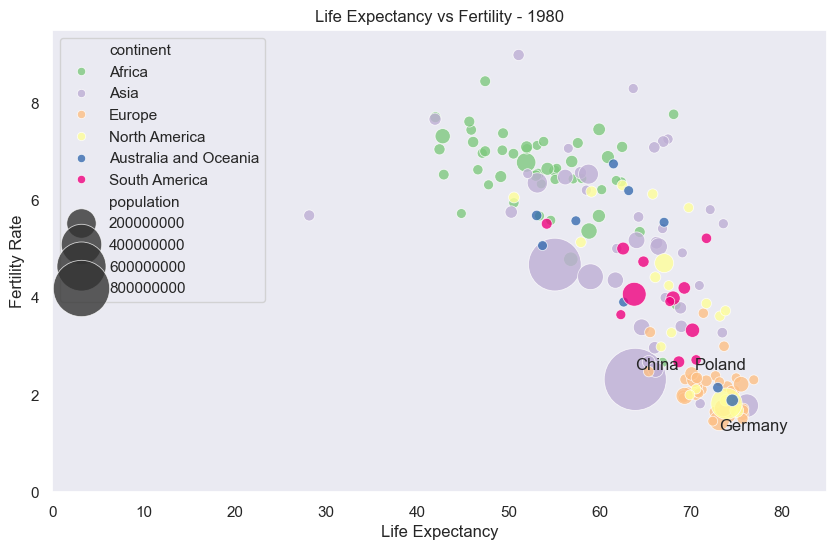

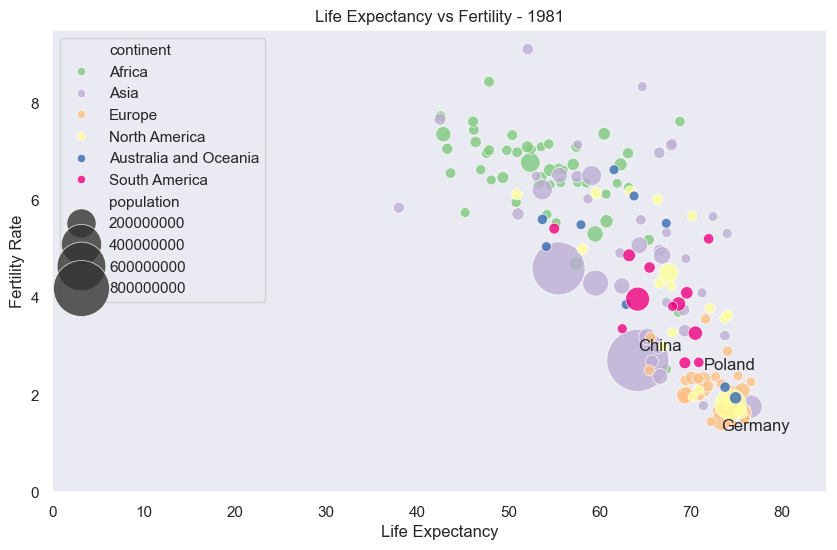

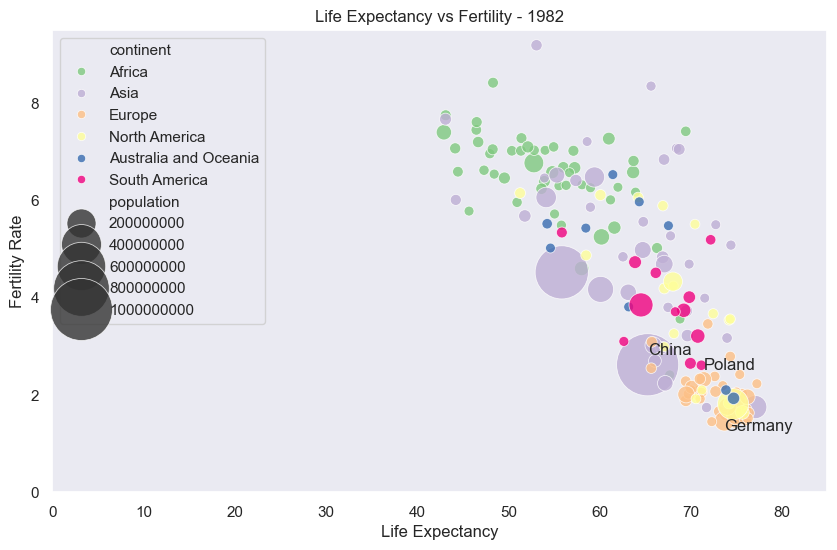

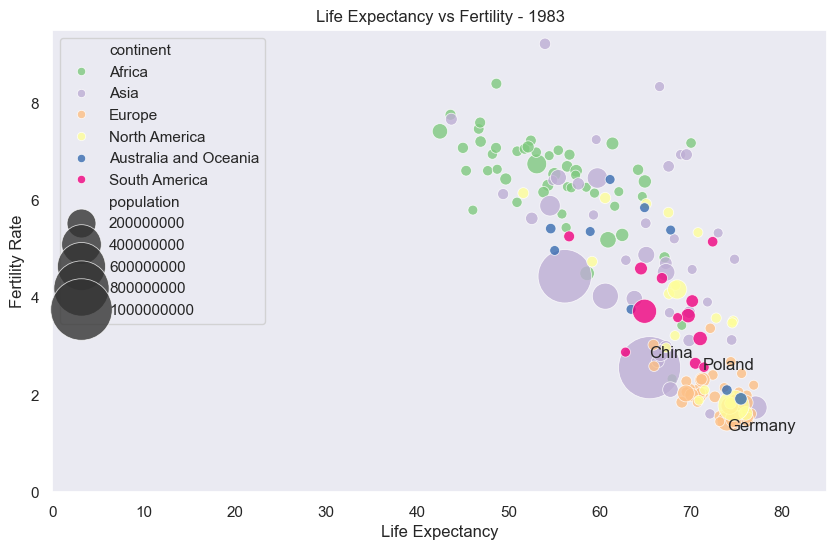

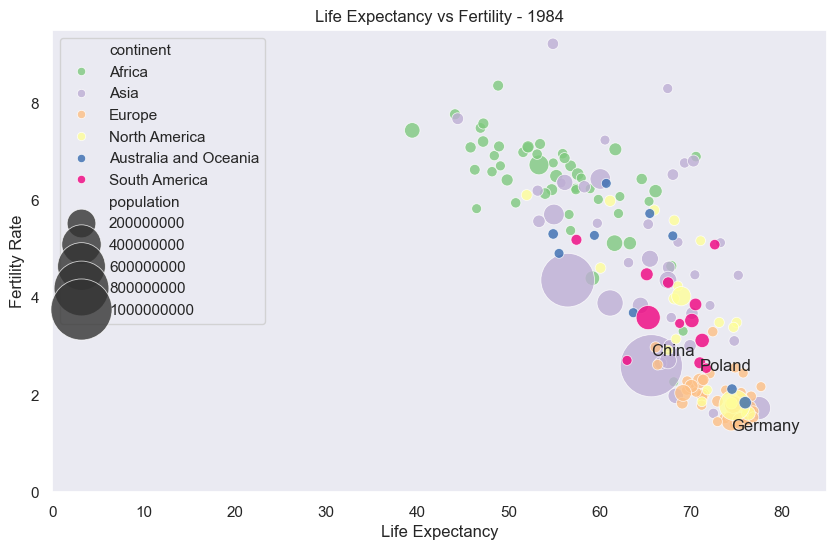

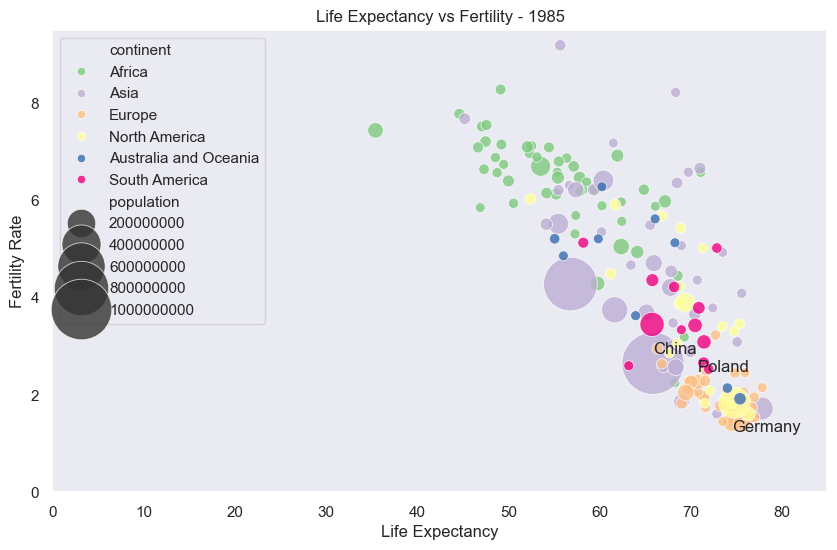

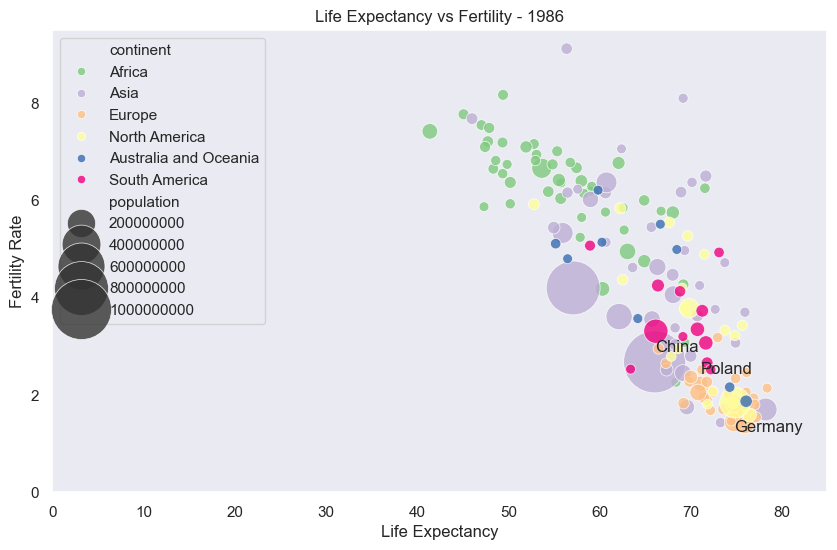

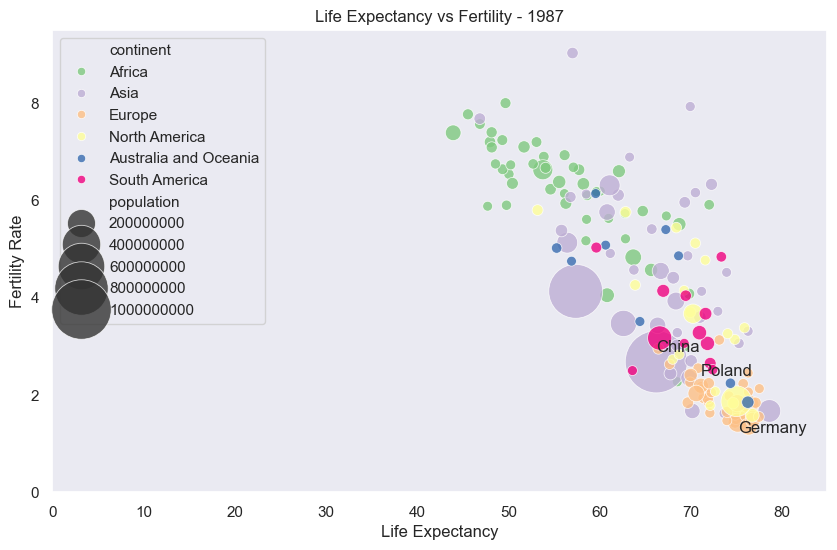

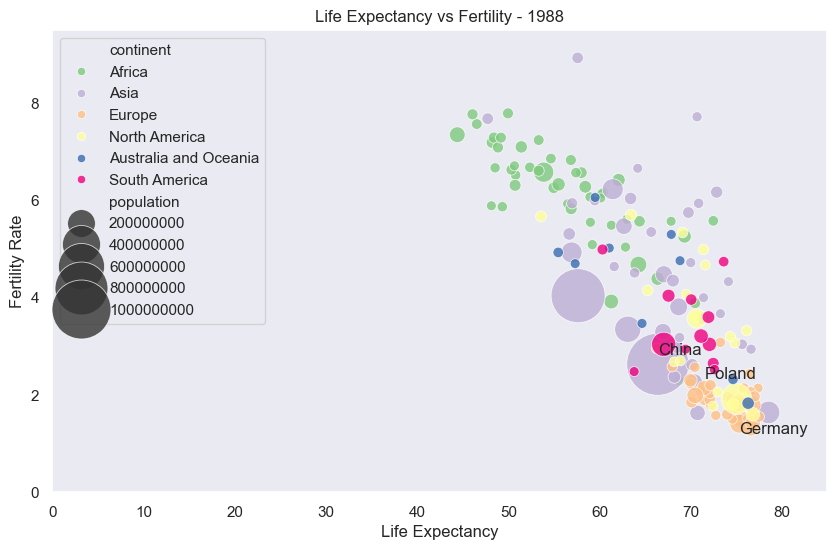

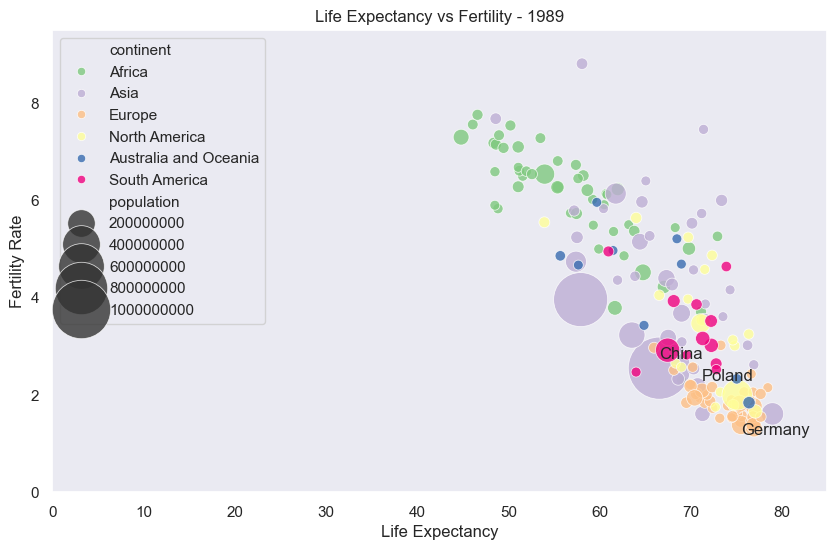

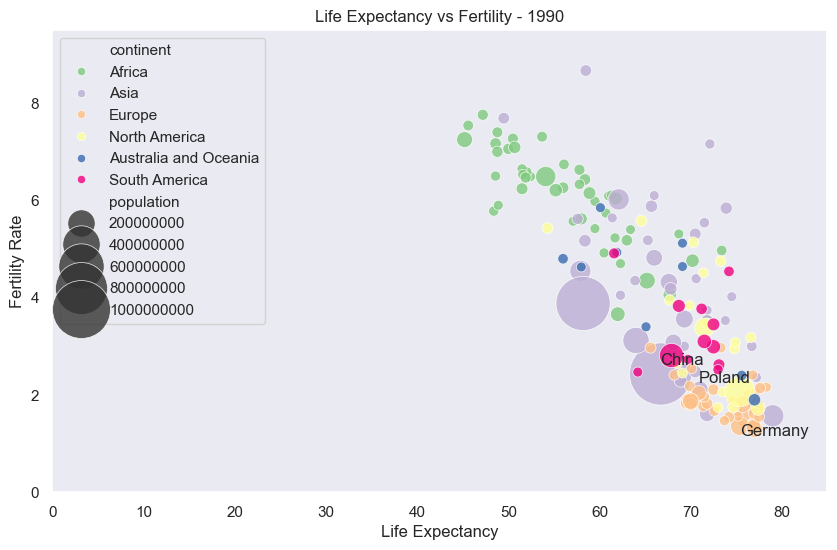

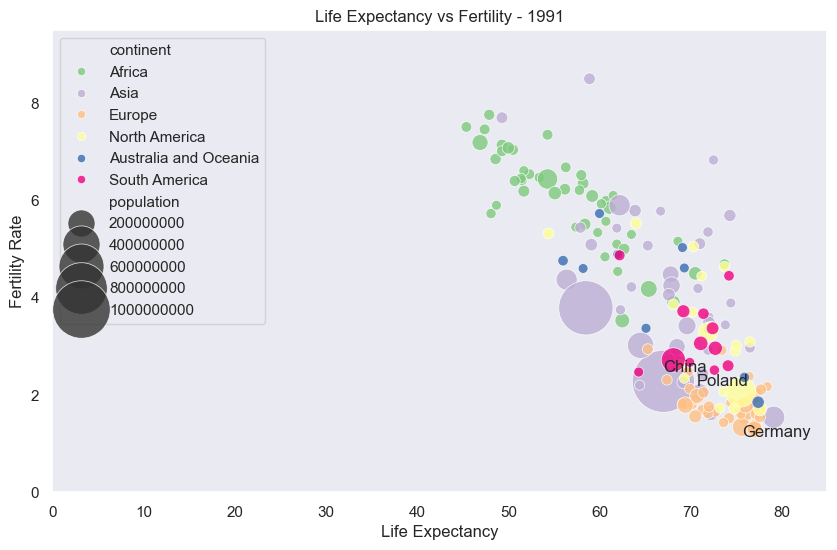

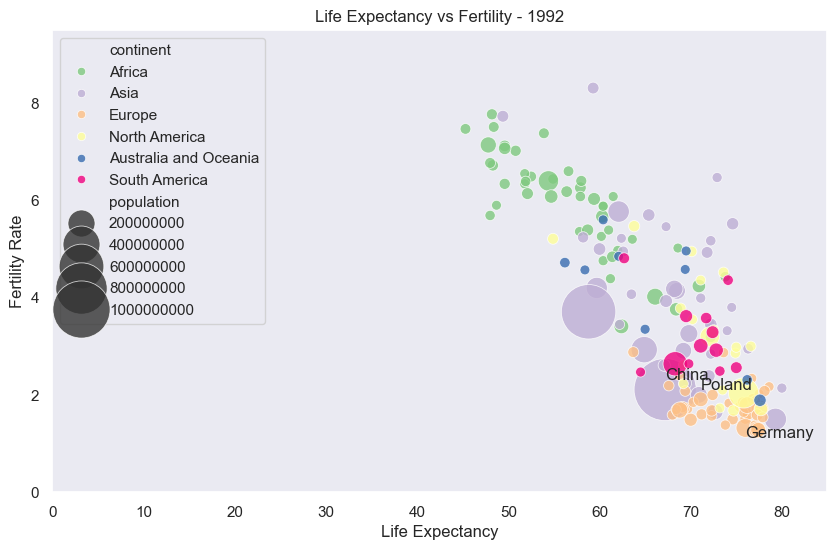

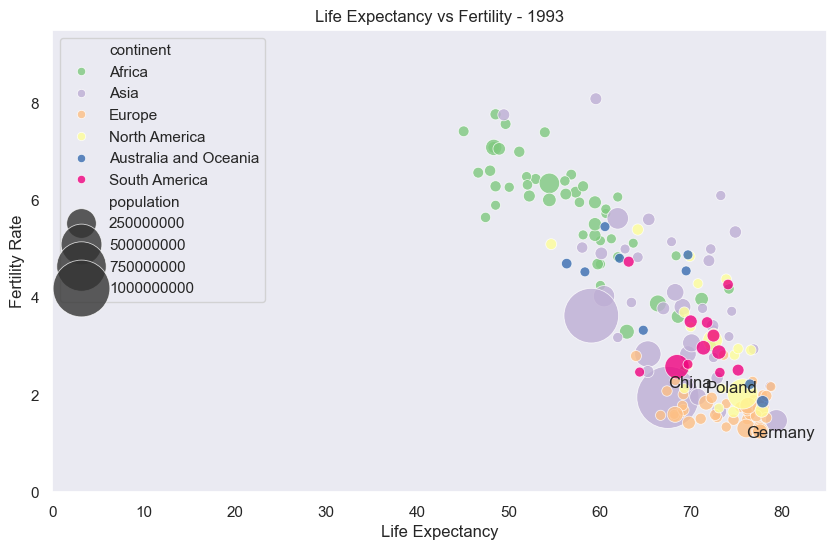

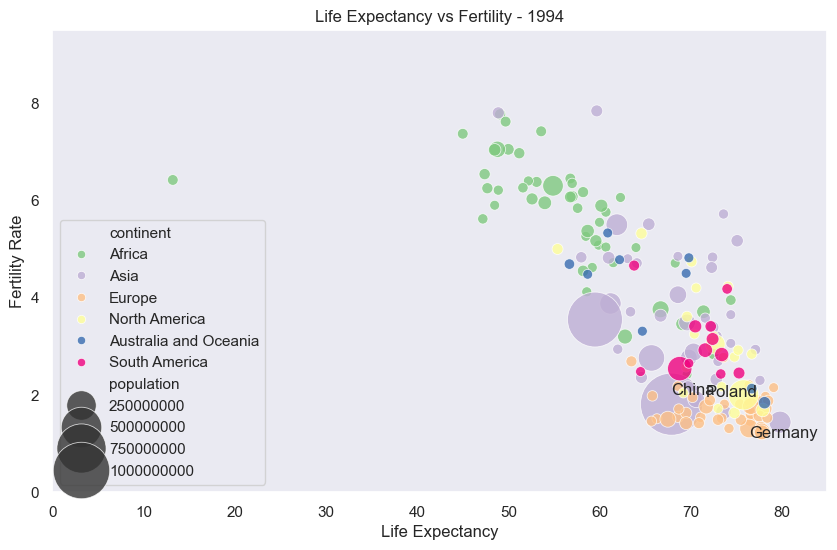

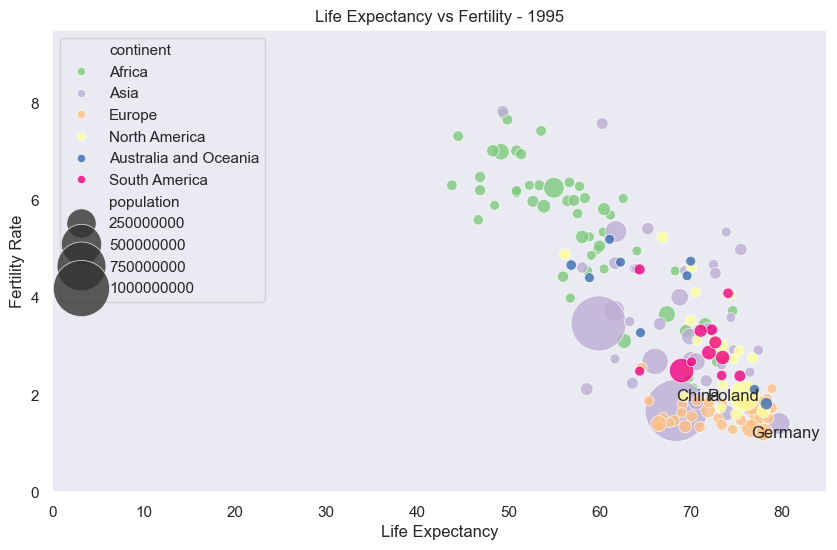

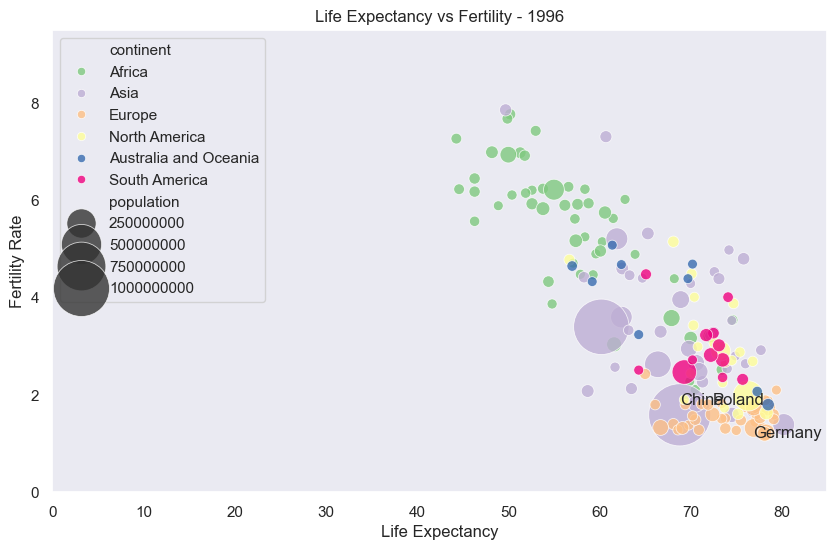

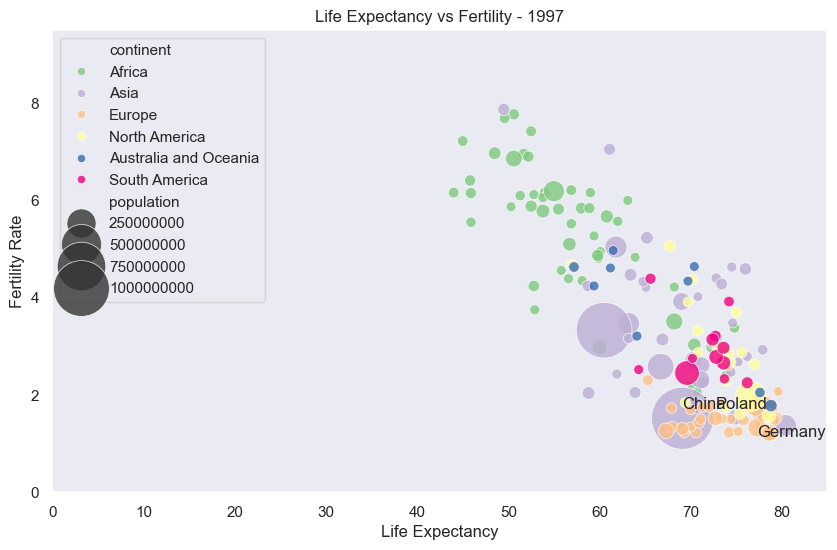

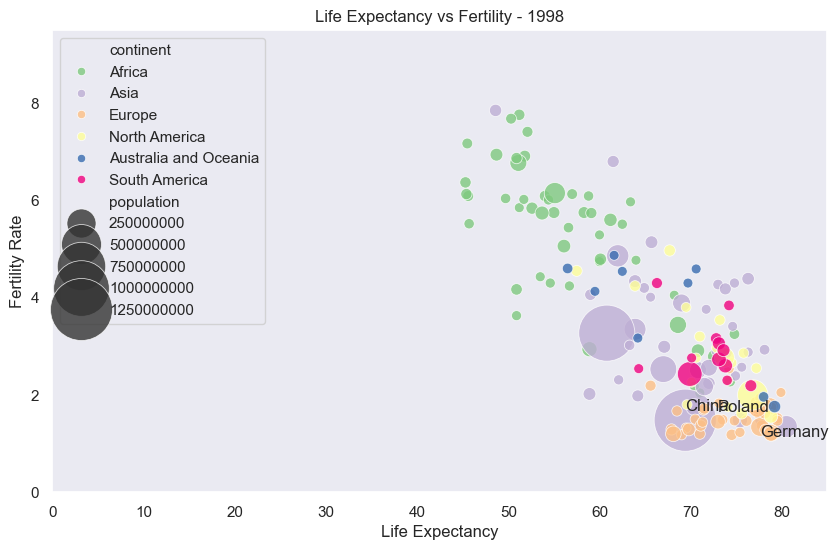

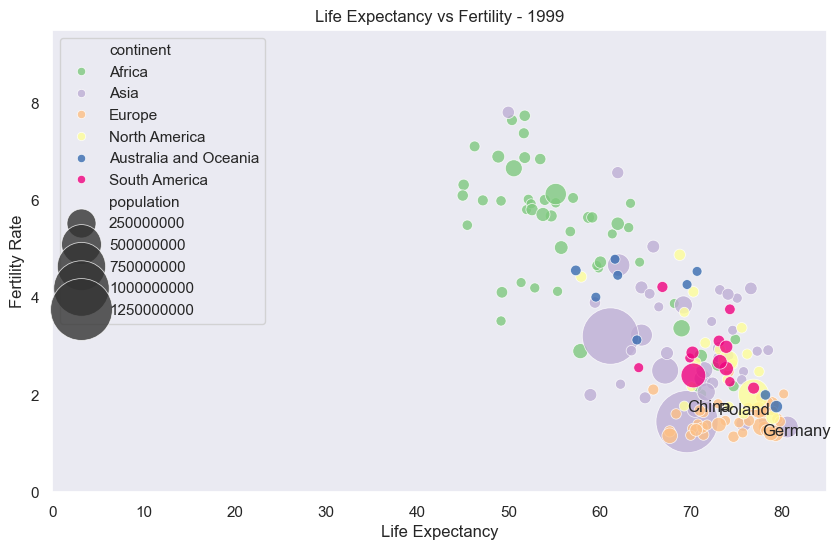

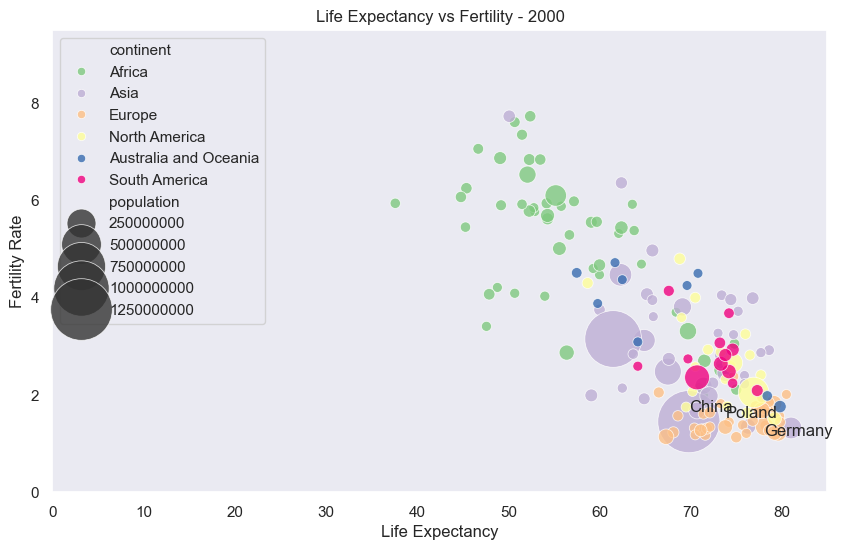

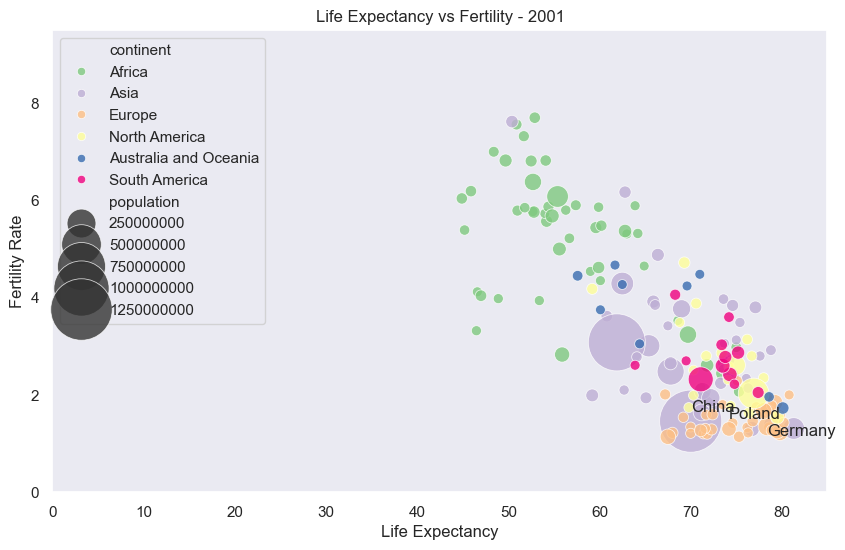

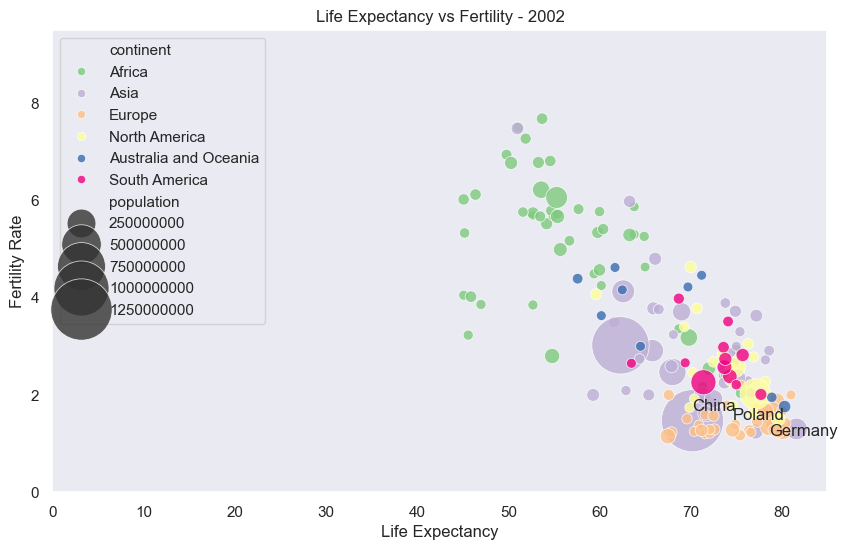

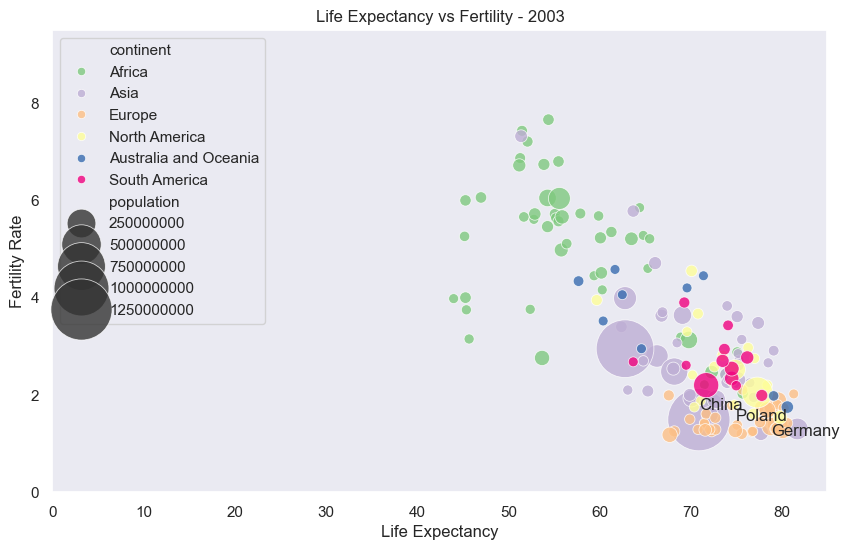

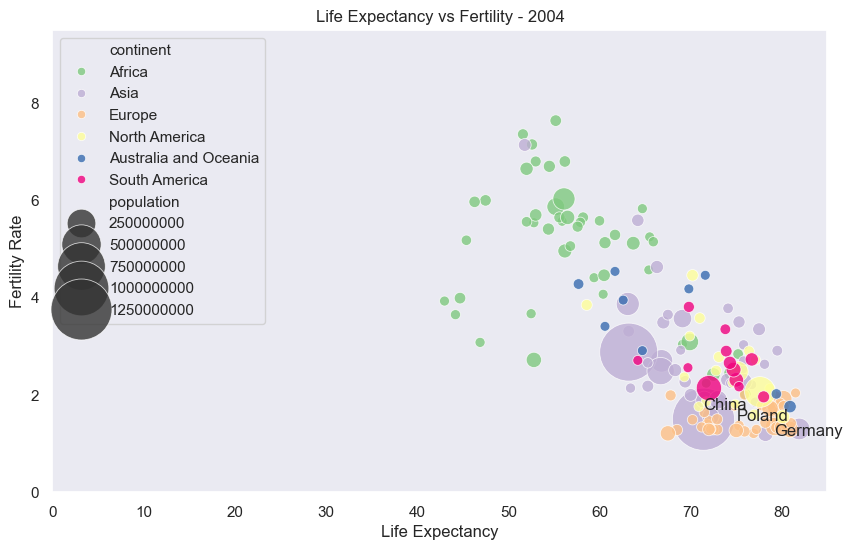

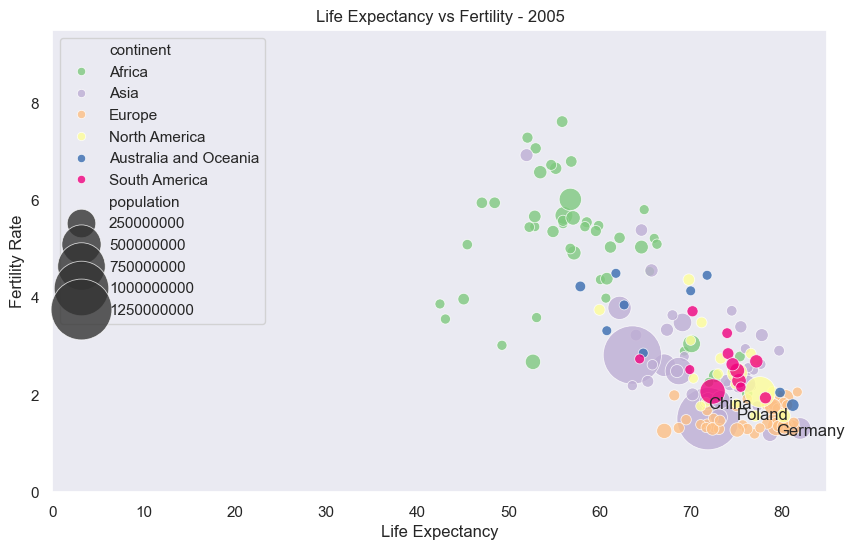

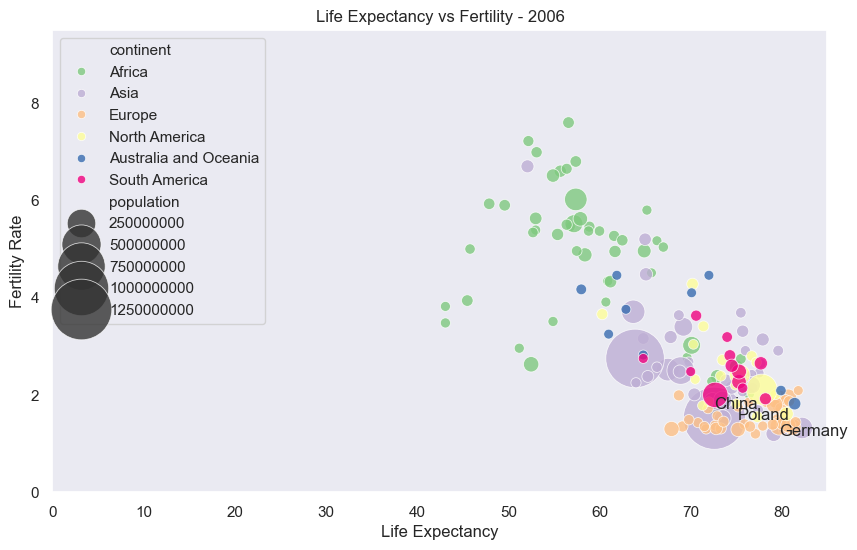

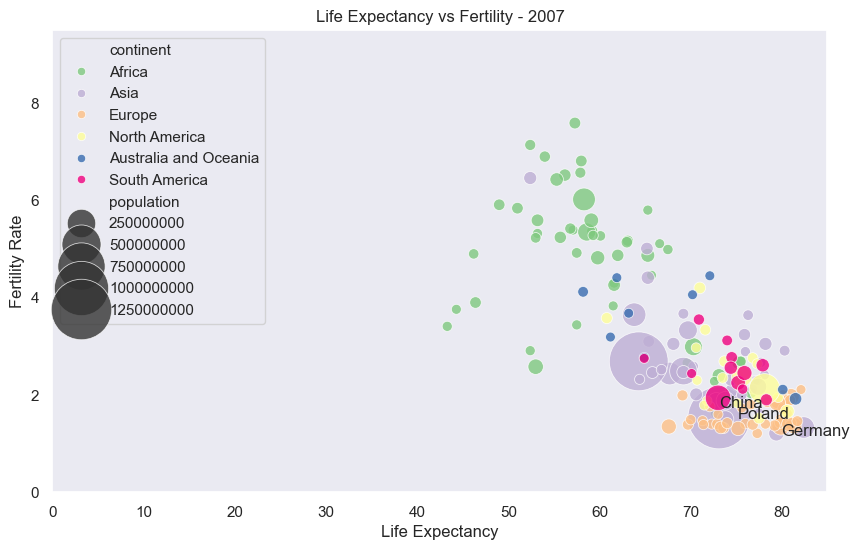

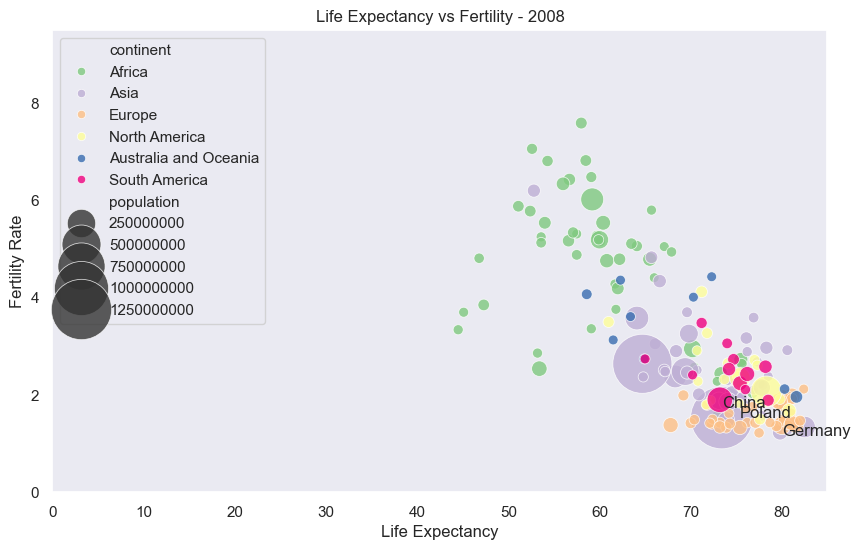

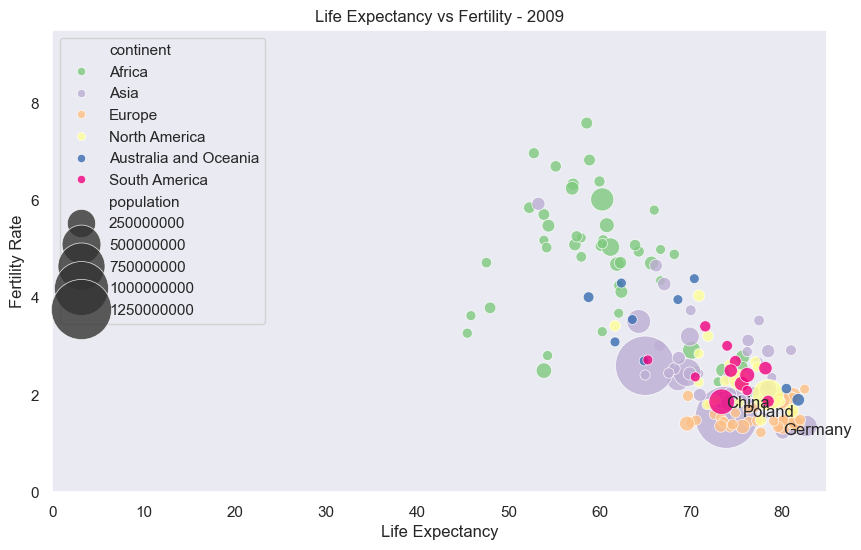

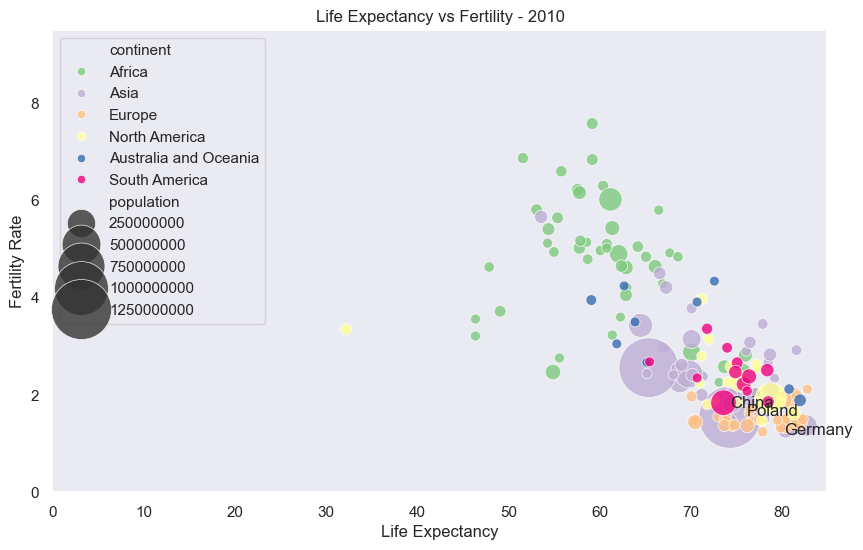

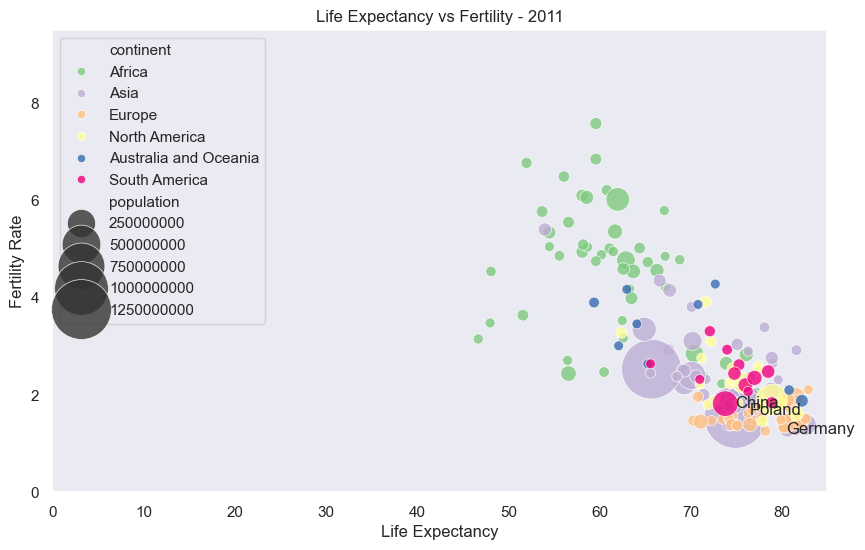

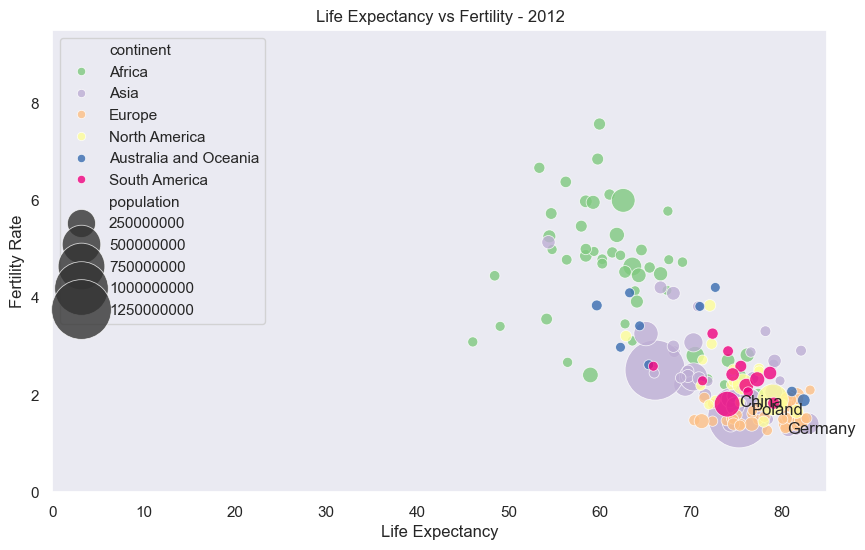

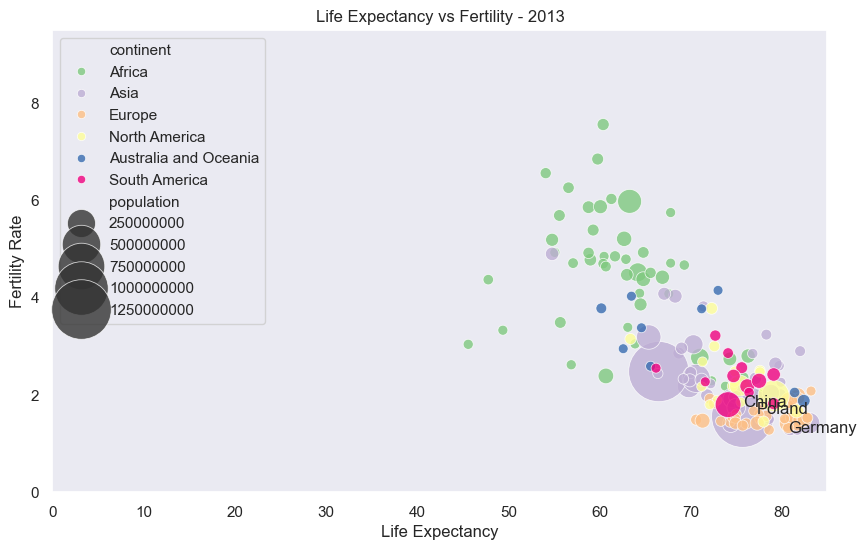

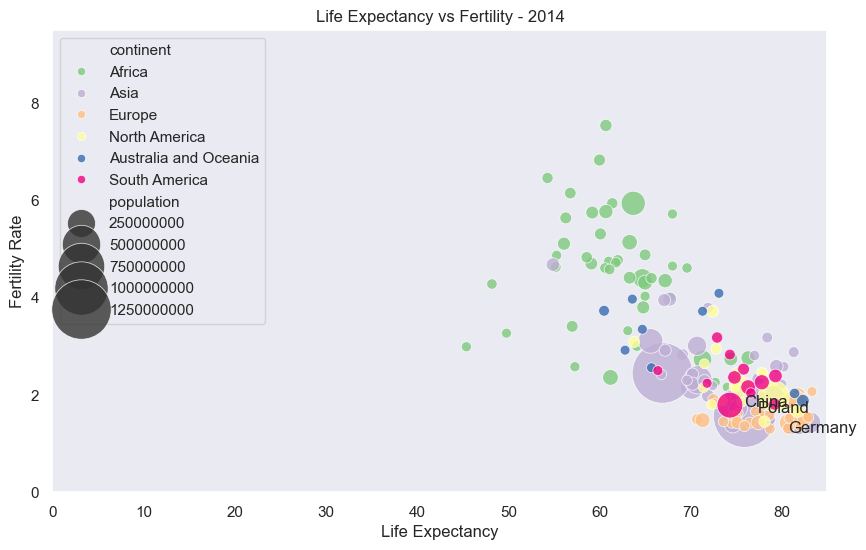

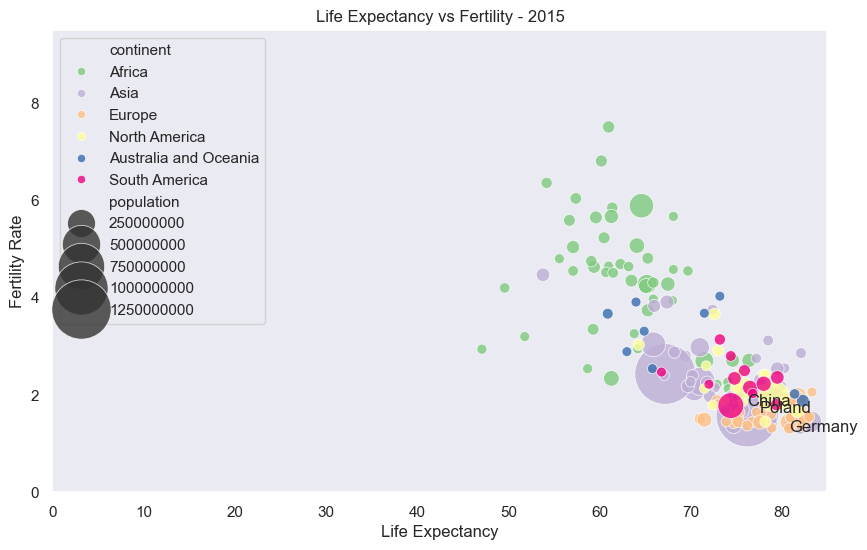

In [6]:
for year in range(1960, 2016): 
    df_subset = df[df['year'] == year]
    plt.figure(figsize=(10, 6))
    plt.axis([0, 85, 0, 9.5])
    plt.legend('lower left')
    plt.ylabel('Fertility Rate')
    plt.xlabel('Life Expectancy')
    sns.scatterplot(x ="life_expectancy", y="fertility", data=df_subset, size = 'population', sizes = (50,2000),
                hue = 'continent',palette="Accent", alpha = 0.8).set(title=f'Life Expectancy vs Fertility - {year}');
    plt.annotate('China',(df_subset[df_subset['country']== 'China']['life_expectancy'].iloc[0], #x-axis
                        df_subset[df_subset['country']== 'China']['fertility'].iloc[0]+0.20)) #y-axis
    plt.annotate('Poland',(df_subset[df_subset['country']== 'Poland']['life_expectancy'].iloc[0],
                        df_subset[df_subset['country']== 'Poland']['fertility'].iloc[0]+0.20)) 
    plt.annotate('Germany',(df_subset[df_subset['country']== 'Germany']['life_expectancy'].iloc[0],
                        df_subset[df_subset['country']== 'Germany']['fertility'].iloc[0]-0.20));
    plt.savefig(f"../07_best_viz/plot_{year}.png");

In [7]:
import imageio

In [12]:
images = []
for year in range(1960, 2016):
    filename = f'../07_best_viz/plot_{year}.png'
    images.append(imageio.imread(filename))

imageio.mimsave('fr_vs_le_titled.gif', images, fps=20, loop=0)

C:\Users\HP\AppData\Local\Temp\ipykernel_11512\487489876.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
